## 1 加载包

In [1]:
library(stm)
library(tidyverse)
library(jiebaR)
library(quanteda)
library(showtext)
library(showtextdb)
# 自动使用 showtext 渲染
showtext_auto()

stm v1.3.7 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: jiebaRD



Package version: 4.0.2
Unicode version: 14.0
ICU version: 70.1



Parallel computing: 4 of 4 threads used.



See https://quanteda.io for tutorials and examples.



Loading required package: sysfonts



Loading required package: showtextdb



## 2 整理数据

In [2]:
#导入数据
data1 <- read.csv(file = "/kaggle/input/dou-data1007/douban_data.csv")


In [3]:
glimpse(data1)

Rows: 108,985
Columns: 10
$ 标题          <chr> "# 阿尔茨海默病：一份温馨的护理指南", ".", ".", "/", "/"…
$ year          <dbl> 2024, 2023, 2023, 2021, 2021, 2021, 2021, 2021, 2021, 20…
$ ip            <chr> "上海", "北京", "海南", "", "", "", "", "", "", "", "", …
$ text          <chr> "# 阿尔茨海默病：一份温馨的护理指南\n      #阿尔茨海默病…
$ diqu          <dbl> 1, 1, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ zuwu          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ text1         <chr> "阿尔茨海默病一份温馨的护理指南阿尔茨海默病一份温馨的护…
$ text1_cut     <chr> "病 一份 护理 指南 病 一份 护理 指南 豆瓣 充满 文艺 气息…
$ text1_cleaned <chr> "病 一份 护理 指南 病 一份 护理 指南 豆瓣 充满 文艺 气息…
$ text2_cleaned <chr> "病 一份 护理 指南 病 一份 护理 指南 充满 气息 社区 分享…


In [4]:
# 从 data1 中选择指定列，并按标题合并相同的行，最后重命名列名
data <- data1 %>%
  select(标题, year, text2_cleaned) %>%
  group_by(标题) %>%
  summarise(
    year = paste(unique(year), collapse = ", "),
    text = paste(text2_cleaned, collapse = " ")
  ) %>%
  ungroup()

In [5]:
glimpse(data)

Rows: 5,379
Columns: 3
$ 标题 <chr> "# 阿尔茨海默病：一份温馨的护理指南", ".", "/", "0", "00后提前经…
$ year <chr> "2024", "2023", "2021", "2021", "2022", "2023", "2024", "2021", "…
$ text <chr> "病 一份 护理 指南 病 一份 护理 指南 充满 气息 社区 分享 感悟 知…


In [6]:
data

标题                                                        
1    # 阿尔茨海默病：一份温馨的护理指南                          
2    .                                                           
3    /                                                           
4    0                                                           
5    00后提前经历养老                                            
6    00后父母都生病了，很崩溃打算和男朋友分手                    
7    00后独生女，想问一下大家考虑过工作以后自己住吗，还有不婚... 
8    00后的独生子女是不是没有90后的多？                          
9    00女，未来买房靠自己的只有我一个吗                          
10   1                                                           
11   100多w全无，结果发现两老不仅社保没买而且房贷也没还。        
12   1@不用豆瓣了                                                
13   2008年高考，现在终于理解了当时妈妈的行为                    
14   2021.9.11                                                   
15   2021中国山东·青岛国际养老产业与养老服务博览会               
16   2021养老前景调查报告                                        
17   2022年发布高龄老人膳食指南编辑版                            
18   20的我开始列起遗物清单                                      
19   21岁，大四，准备读研，父亲查出肺癌，母亲已经退休，请问我... 
20   22岁确诊恶性肿瘤/记录贴                                     
21   26岁独生女，面对一个早搏焦虑的妈妈和脑梗康复的爸爸          
22   26打算独居结果被爸妈定规矩                                  
23   27岁独生女只有妈妈，妈妈的店最近投资了一笔钱装修，升级设... 
24   28岁，不想和父母交流...                                     
25   30加的独生子女                                              
26   30多岁独生女可能一辈子不结婚了                              
27   30岁之后才清醒认识                                          
28   30岁，感觉自己挺没用的，57岁父亲还在辛苦工作                
29   32岁感觉比不上父亲，挺没用的                                
30   35岁单身狗，打工业余时间经常想回家，看父母，我也不知道怎么了
⋮    ⋮                                                           
5350 问题，有独生子女的丁克吗                                    
5351 间歇性讨厌我妈，该怎么改变这种心理                          
5352 除了政策因素，你的父母为什么选择只生一个？                  
5353 随着父母年纪渐长身体变差，他们变成了我的小孩                
5354 随记                                                        
5355 隔代感受养老焦虑                                            
5356 难                                                          
5357 难以回复我爸的微信……                                        
5358 难道照顾亲生父母不可以抱怨吗？                              
5359 零零后二胎应该更少了                                        
5360 非常想投身养老事业，有没有想一起的？                        
5361 非常非常担心父母身体该怎么调节                              
5362 非常非常有同感，90后独生已经开始初尝养老不易                
5363 面对年迈的父母，有一天他自己身体状况不能自己去医院了，你... 
5364 面对独生子女有些选择真的很难！                              
5365 面对老病父母的要求你们都会满足吗？                          
5366 题外话，独生女面对高需求父母怎么办                          
5367 餐后血糖从10.7到7.5，父上大人的一个月血糖恢复经验分享       
5368 饮食事项                                                    
5369 首帖｜忽然发现我根本不了解他                                
5370 首阳当时算重症进的医院，现在二阳了，还要去医院吗？          
5371 鸭梨山大                                                    
5372 （买了小米的）有没有豆友买过监控设备的？                    
5373 （分享）复旦大学附属肿瘤医院癌症风险评估测试                
5374 （吐槽向 已看组务 不妥可删）   现代社会，女性享有合法继承...
5375 （已解决，勿再回，谢谢）大家会把工资给父母吗                
5376 （还是找到了棒棒师傅）非电梯房怎么送不能行走的老人去医院    
5377 ，                                                          
5378 ？                                                          
5379 ～                                                          
     year                  
1    2024                  
2    2023                  
3    2021                  
4    2021                  
5    2022                  
6    2023                  
7    2024                  
8    2021                  
9    2020                  
10   2021, 2022, 2023, 2024
11   2023                  
12   2022                  
13   2021                  
14   2021                  
15   2020                  
16   2021                  
17   2023                  
18   2020                  
19   2023                  
20   2022, 2023            
21   2023                  
22   2024                  
23   2024                  
24   2021                  
25   2021                  
26   2023               

## 3 准备数据

In [7]:
# 4. Text processing using textProcessor (since the text is already segmented)
processed <- textProcessor(documents = data$text, 
                           metadata = data, 
                           removestopwords = FALSE,
                           removepunctuation = FALSE,
                           stem = FALSE,
                          wordLengths = c(2,Inf))



Building corpus... 
Converting to Lower Case... 
Removing numbers... 
Creating Output... 


In [8]:
# 5. Prepare documents for STM without removing low frequency terms
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)
print(head(out$documents))  # View the first few processed documents

Removing 183 of 12986 terms (183 of 457575 tokens) due to frequency 
Your corpus now has 5332 documents, 12803 terms and 457392 tokens.

$`1`
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   45  149  192  245  653  917 1052 1236 1318  1458  1476  1537  1627  1773
[2,]    2    2    2    1    2    1    1    1    1     1     1     1     1     1
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]  1865  2239  2287  2395  2472  2533  2757  2951  2985  3330  3717  3722
[2,]     2     1     1     5     1     2     1     1     1     1     1     1
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]  3729  4591  4601  4638  4639  4701  4747  4852  4875  4944  5108  5110
[2,]     1     1     1     1     1     2     2     1     1     1     1     2
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]  5157  5316  5594  5612  5738  5837  5840  5851  5857  5862  5955  5974
[2,]     1     2     1     1     2     1    15     1     1     3     1     3
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,6

In [9]:
# out$documents格式为：每条文本分词对应词汇表vocab中的id，以及词频
head(out$documents, 5)
head(out$vocab, 200)
head(out$meta, 5)

$`1`
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   45  149  192  245  653  917 1052 1236 1318  1458  1476  1537  1627  1773
[2,]    2    2    2    1    2    1    1    1    1     1     1     1     1     1
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]  1865  2239  2287  2395  2472  2533  2757  2951  2985  3330  3717  3722
[2,]     2     1     1     5     1     2     1     1     1     1     1     1
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]  3729  4591  4601  4638  4639  4701  4747  4852  4875  4944  5108  5110
[2,]     1     1     1     1     1     2     2     1     1     1     1     2
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]  5157  5316  5594  5612  5738  5837  5840  5851  5857  5862  5955  5974
[2,]     1     2     1     1     2     1    15     1     1     3     1     3
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,60] [,61] [,62]
[1,]  5977  5984  6009  6317  6332  6388  6598  6805  6825  6863  7013  7113
[2,]     1     1     1     1     1    10     3     1     3     1     3     1
     [,63] [,64] [,65] [,66] [,67] [,68] [,69] [,70] [,71] [,72] [,73] [,74]
[1,]  7155  7162  7244  7247  7263  7343  7368  7521  7924  7993  8326  8523
[2,]     1     1     1     1     1     1     1     3     1     1     2     2
     [,75] [,76] [,77] [,78] [,79] [,80] [,81] [,82] [,83] [,84] [,85] [,86]
[1,]  8540  8543  8564  8640  8706  8749  8792  9042  9060  9381  9421  9462
[2,]     4     1     1     1     1     3     4     4     1     3     1     1
     [,87] [,88] [,89] [,90] [,91] [,92] [,93] [,94] [,95] [,96] [,97] [,98]
[1,]  9473  9504  9703  9792 10003 10016 10048 10284 10378 10650 10651 10837
[2,]     3     1     1     2     1     1     2     3     1     1     1     1
     [,99] [,100] [,101] [,102] [,103] [,104] [,105] [,106] [,107] [,108]
[1,] 10917  11037  11048  11104  11124  11128  11169  11171  11224  11543
[2,]     1      2      1      1      2      4      1      1      1      1
     [,109] [,110] [,111] [,112] [,113] [,114] [,115] [,116] [,117] [,118]
[1,]  11605  11781  11949  11971  11976  12298  12450  12482  12498  12793
[2,]      2      1      1      2      1      2      1      1      1      2

$`2`
     [,1] [,2]  [,3]  [,4]  [,5]  [,6]  [,7]
[1,] 5147 9237 10443 11172 11260 12218 12250
[2,]    2    1     2     1     1     1     1

$`3`
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   42   76  108  109  128  163  169  205  227   238   286   312   369   390
[2,]    3    9    6    3    9    3    9    3    3     9     3     3     3     9
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]   406   445   487   501   511   525   539   560   590   605   619   623
[2,]     6     6     9    12     3     6     3     9     6     6     6    12
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]   634   678   702   707   710   735   737   744   842   848   863   866
[2,]     3     3     3     3    27     3    15     3     3     6     3     3
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]   911   939   948  1048  1066  1077  1108  1133  1217  1230  1245  1326
[2,]     3     3     3     3     9     6     3     3     3     3     6     3
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,60] [,61] [,62]
[1,]  1336  1402  1459  1470  1472  1478  1515  1532  1540  1557  1626  1640
[2,]     3     6     3     3     3     6     3     3     3     3     3     3
     [,63] [,64] [,65] [,66] [,67] [,68] [,69] [,70] [,71] [,72] [,73] [,74]
[1,]  1795  1818  1820  1850  1863  1916  1993  2054  2061  2076  2135  2216
[2,]     3     3     3     3     3     3     6     3     3     3     9     3
     [,75] [,76] [,77] [,78] [,79] [,80] [,81] [,82] [,83] [,84] [,85] [,86]
[1,]  2245  2300  2303  2331  2357  2383  2407  2411  2413  2437  2540  

[1] "一丁点"   "一万"     "一万个"   "一万二"   "一万五"   "一万元"  
  [7] "一万块"   "一万多"   "一万左右" "一万步"   "一下下"   "一下子"  
 [13] "一丝"     "一两"     "一两万"   "一两个"   "一两千"   "一两句"  
 [19] "一两周"   "一两天"   "一两岁"   "一两年"   "一两次"   "一两点"  
 [25] "一两百"   "一两百万" "一个个"   "一个包"   "一个半"   "一个半月"
 [31] "一个多"   "一个多月" "一个愿打" "一个月"   "一个样"   "一个点"  
 [37] "一个班"   "一个男孩" "一事"     "一二"     "一代"     "一代人"  
 [43] "一代代"   "一件"     "一份"     "一会"     "一会儿"   "一位"    
 [49] "一体"     "一個"     "一倍"     "一儿"     "一出"     "一刀"    
 [55] "一分"     "一分一毫" "一分钟"   "一分钱"   "一刻"     "一副"    
 [61] "一包"     "一千"     "一千万"   "一千五"   "一千块"   "一千多"  
 [67] "一千左右" "一半"     "一半一半" "一半儿"   "一半多"   "一厅"    
 [73] "一双"     "一发"     "一口"     "一句"     "一只"     "一台"    
 [79] "一名"     "一员"     "一周"     "一味"     "一回"     "一团"    
 [85] "一圈"     "一场"     "一块"     "一块钱"   "一堆"     "一声"    
 [91] "一处"     "一多"     "一夜"     "一大"     "一大半"   "一大块"  
 [97] "一大堆"   "一大截"   "一大笔"   "一大部分" "一天两天" "一天天"  
[103] "一头"     "一套"     "一套套"   "一女"     "一室"     "一家"    
[109] "一家人"   "一家子"   "一对"     "一对一"   "一封"     "一小块"  
[115] "一小部分" "一层"     "一层楼"   "一岁"     "一带"     "一帮"    
[121] "一幕"     "一平"     "一年"     "一年半载" "一床"     "一座"    
[127] "一弟"     "一张"     "一户"     "一所"     "一手"     "一打"    
[133] "一批"     "一把"     "一招"     "一拳"     "一挺"     "一排"    
[139] "一搏"     "一摊"     "一支"     "一整天"   "一斤"     "一方"    
[145] "一日"     "一日三餐" "一晃"     "一月"     "一本"     "一朵"    
[151] "一条"     "一杯"     "一枚"     "一架"     "一栋"     "一根"    
[157] "一桌"     "一档"     "一棵"     "一楼"     "一次次"   "一款"    
[163] "一步"     "一步步"   "一段"     "一毛钱"   "一流"     "一滴"    
[169] "一点"     "一点一点" "一点儿"   "一点多"   "一点点"   "一瓶"    
[175] "一生"     "一百"     "一百万"   "一百个"   "一百块"   "一百多"  
[181] "一百多万" "一百多元" "一百多块" "一百岁"   "一盆"     "一盒"    
[187] "一盘"     "一眼"     "一瞬间"   "一碗"     "一碗水"   "一种"    
[193] "一秒"     "一程"     "一站"     "一笔"     "一等"     "一箱"    
[199] "一篇"     "一米"

标题                               year
1 # 阿尔茨海默病：一份温馨的护理指南 2024
2 .                                  2023
3 /                                  2021
4 0                                  2021
5 00后提前经历养老                   2022
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## 4 searchk

In [10]:
# 6. Use searchK function to determine optimal number of topics with covariate 'year'
search_result <- searchK(documents = out$documents, vocab = out$vocab, 
                         K = c(5, 10, 15, 20,25,30,35,40), prevalence = ~year, 
                         data = out$meta, max.em.its = 75, verbose = FALSE)



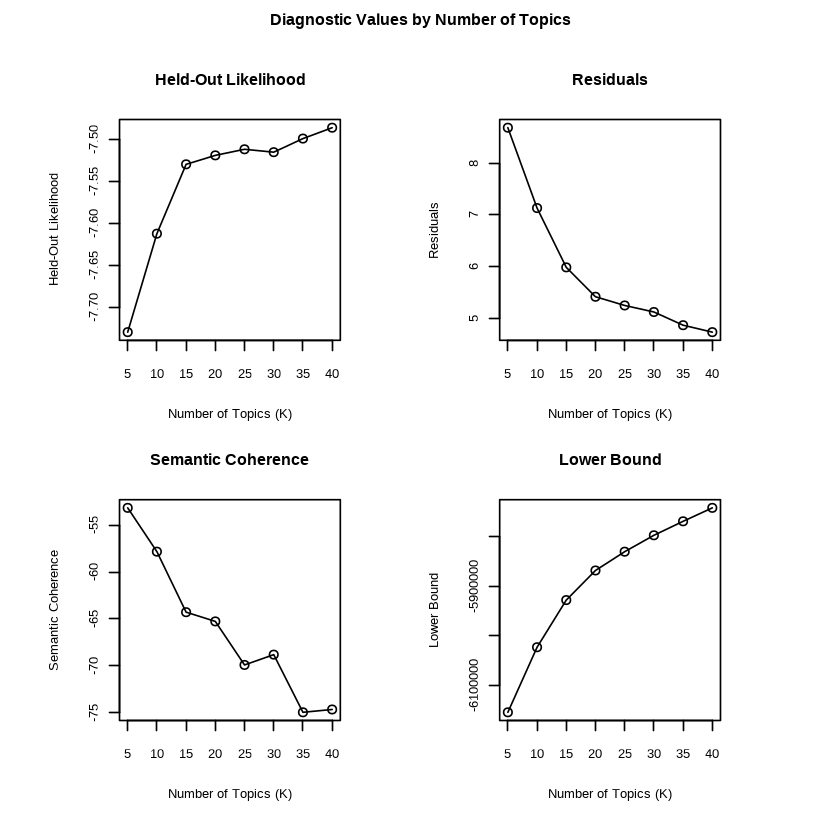

In [11]:
# 7. Plot searchK results to visualize optimal K
plot(search_result)